# Experiment Two: Switches in Observation Noise

Assume that $s_t \sim \mathcal{N}(s_{t-1},\nu)$ for constant process variance $\nu$. Further, assume that 
$$o_t \sim \mathcal{N}(s_t, \sigma_t^2).$$
Throught the trial, observation noise $\sigma_t^2$ switches between two values $\sigma_\ell^2, \sigma_h^2,$ where $\sigma_\ell^2 < \sigma_h^2$.

In [1]:
# import and fix seed 
from vkf import VKF
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(42)
from run_switch_vkf import run_switch_vkf
from rolling_lambda_analysis import lambda_rolling_average_analysis

## 1. One Trial Example

In [2]:
# Set parameters
T = 1000             # Number of time steps
s_low = 0.4       # Observation noise (std dev) in predictable phase
s_high = 0.1# Observation noise (std dev) in unpredictable phase
switch_interval = 200 # Interval for switching between volatility phases
s0 = 10 #initial latent state
l = 0.1 #lambda
v0 = 0.1 # initial volatility estimate
s = 0.1 # Initial posterior variance estimate 
switches = list(range(0, T + 1, 200))

In [3]:
latent_state, observations, signals = run_switch_vkf(T,s0,s_low,s_high,v0=v0,l=l,s=s,switch_indices=switches)


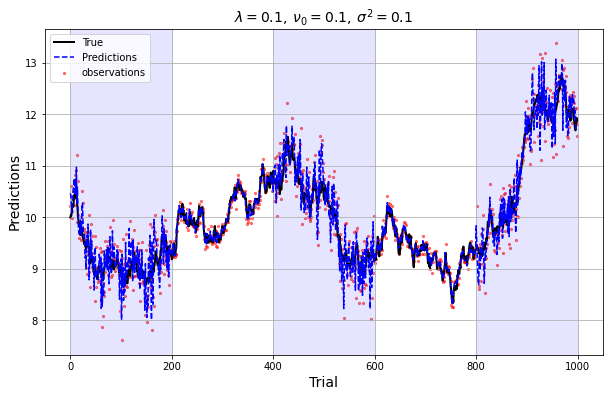

In [4]:
#extract relevant valuess 
m = signals['predictions']
vol = signals['volatility'] 
lr = signals['learning_rate']

#set up plot 
plt.figure(figsize=(10,6)) 
plt.plot(latent_state,label='True', color='black', linewidth=2)
plt.title(rf"$\lambda={l},\: \nu_0={v0}, \: \sigma^2={s}$", fontsize=14)
plt.grid()
plt.xlabel('Trial', fontsize=14)

# Shade regions: 0-50, 100-150, 200-250, etc.
for start in range(0, len(latent_state), 2*switch_interval):
    plt.axvspan(start, start + switch_interval, color='blue', alpha=0.1)

#plot observations
plt.scatter(range(len(observations)), observations, label='observations', color='red', alpha=0.5, s=5)
plt.ylabel("Predictions", fontsize=14)
plt.plot(m[2:], label='Predictions', color='blue', linestyle='--')
plt.legend()
plt.savefig("Figures/exp2_walk.png")

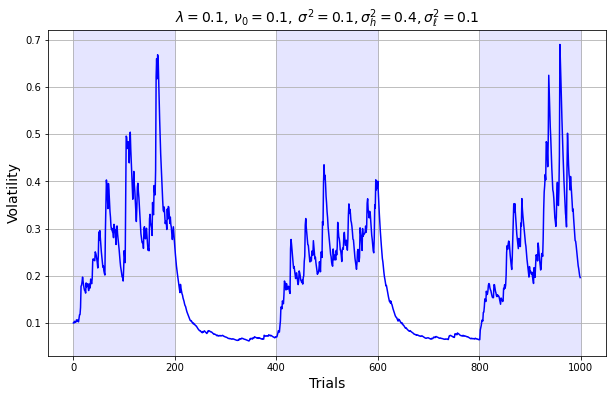

In [6]:
plt.figure(figsize=(10,6)) 

# Shade regions: 0-50, 100-150, 200-250, etc.
for start in range(0, len(latent_state), 2*switch_interval):
    plt.axvspan(start, start + switch_interval, color='blue', alpha=0.1)
    
plt.plot(vol,color='blue')
plt.grid()
plt.xlabel('Trials', fontsize=14); plt.ylabel('Volatility', fontsize=14) 
plt.title(rf"$\lambda={l},\: \nu_0={v0}, \: \sigma^2=0.1, \sigma_h^2 = 0.4, \sigma_\ell^2 = 0.1$", fontsize=14)
plt.savefig("Figures/exp2_vol.png"); plt.show()

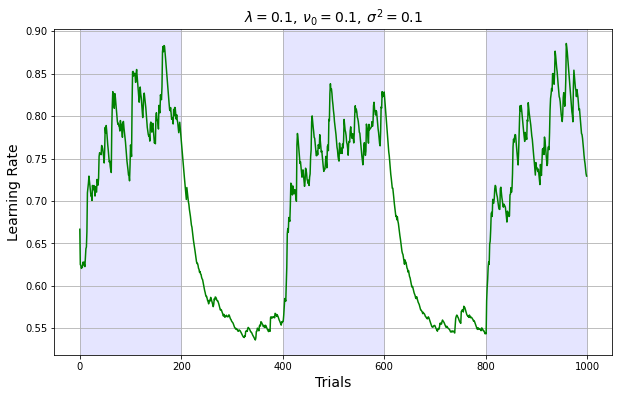

In [7]:
plt.figure(figsize=(10,6)) 

# Shade regions: 0-50, 100-150, 200-250, etc.
for start in range(0, len(latent_state), 2*switch_interval):
    plt.axvspan(start, start + switch_interval, color='blue', alpha=0.1)
    
plt.plot(lr,color='green') 
plt.grid()
plt.xlabel('Trials', fontsize=14); plt.ylabel('Learning Rate', fontsize=14) 
plt.title(rf"$\lambda={l},\: \nu_0={v0}, \: \sigma^2={s}$", fontsize=14)
plt.savefig("Figures/exp2_lr.png"); plt.show()

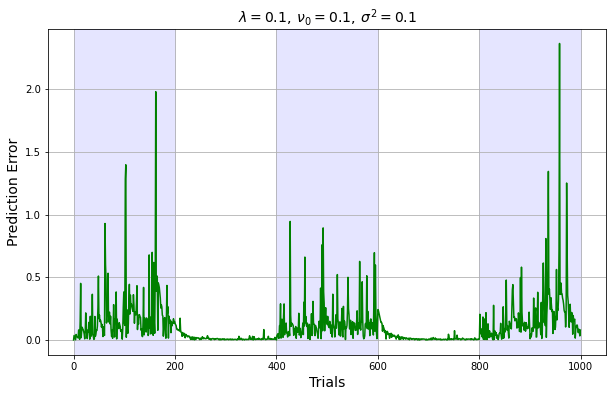

In [8]:
plt.figure(figsize=(10,6)) 

abs_delta = abs(signals['prediction_error'])

# Shade regions: 0-50, 100-150, 200-250, etc.
for start in range(0, len(latent_state), 2*switch_interval):
    plt.axvspan(start, start + switch_interval, color='blue', alpha=0.1)
    
plt.plot(abs(signals['volatility_error']),color='green') 
plt.grid()
plt.xlabel('Trials', fontsize=14); plt.ylabel('Prediction Error', fontsize=14) 
plt.title(rf"$\lambda={l},\: \nu_0={v0}, \: \sigma^2={s}$", fontsize=14)
plt.savefig("Figures/exp2_prederr.png"); plt.show()

## Part 2. Rolling Average

In [9]:
l_vals, correlations = lambda_rolling_average_analysis(T,s0,s_low,s_high,v=0.1,v0=v0,s=s,switch_indices=switches,l_num=200)

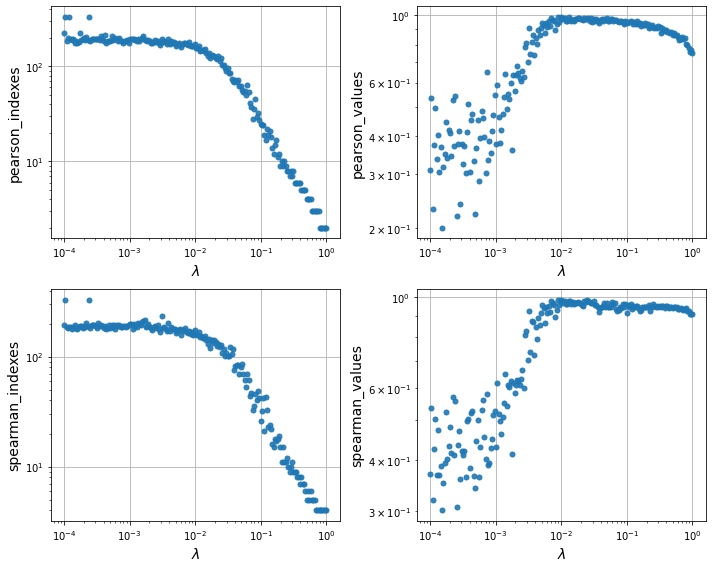

In [10]:
# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Loop through keys and corresponding axes
for i, key in enumerate(correlations.keys()):
    ax = axes[i]
    ax.loglog(l_vals, correlations[key], 'o', markersize=5, alpha=0.9)
    ax.set_ylabel(key, fontsize=14)
    ax.set_xlabel('$\lambda$', fontsize=14)
    ax.grid()

# Adjust layout to avoid overlap
plt.tight_layout()

#save fig
plt.savefig("Figures/exp2_cors.png")

# Show the complete figure
plt.show()

In [11]:
from scipy.stats import linregress

# Assume `x` and `y` are your data
log_x = np.log10(ls)[-20:]
log_y = np.log10(cors['pearson_indexes'])[-20:]

# Perform linear regression on log-transformed data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print(f"w*l = {10**intercept}")

NameError: name 'ls' is not defined

In [ ]:
# Assume `x` and `y` are your data
log_x = np.log10(ls)[-90:]
log_y = np.log10(cors['spearman_indexes'])[-90:]

# Perform linear regression on log-transformed data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print(f"w*l = {10**intercept}")

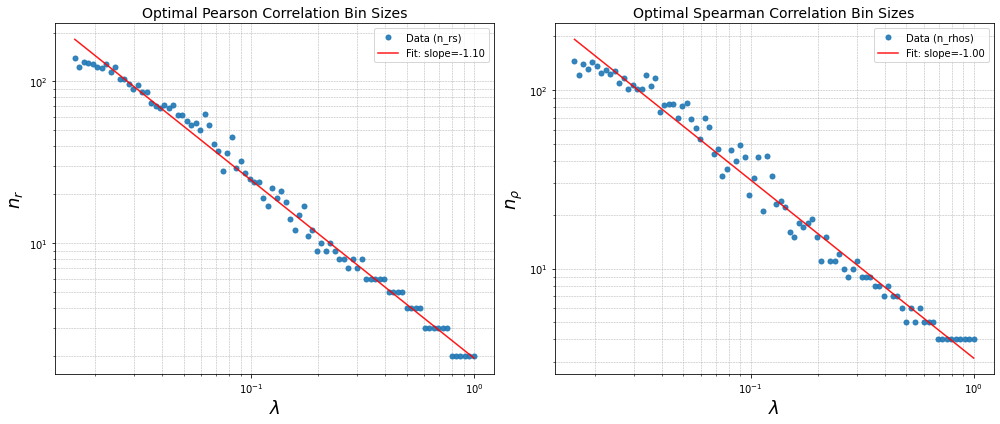

Pearson Correlation:
  Slope: -1.100902173085383
  Intercept: 0.28971497194364493
  R-squared: 0.9896650011908288
  w*l = 1.948565333945681

Spearman Correlation:
  Slope: -0.9990189087912308
  Intercept: 0.4978665795917655
  R-squared: 0.9792188866953281
  w*l = 3.146781437065762


In [16]:
from scipy.stats import linregress
n_rs = correlations['pearson_indexes']
n_rhos = correlations['spearman_indexes']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pearson Correlation (n_rs)
log_x_rs = np.log10(l_vals)[110:]
log_y_rs = np.log10(n_rs)[110:]
slope_rs, intercept_rs, r_value_rs, _, _ = linregress(log_x_rs, log_y_rs)

axes[0].loglog(l_vals[110:], n_rs[110:], 'o', markersize=5, alpha=0.9, label="Data (n_rs)")
regression_line_rs = 10**(slope_rs * log_x_rs + intercept_rs)
axes[0].loglog(l_vals[110:], regression_line_rs, color="red", alpha=0.9, label=f"Fit: slope={slope_rs:.2f}")
axes[0].set_title("Optimal Pearson Correlation Bin Sizes", fontsize=14)
axes[0].set_xlabel('$\lambda$', fontsize=18)
axes[0].set_ylabel('$n_r$',fontsize=18)
axes[0].legend()
axes[0].grid(True, which="both", linestyle="--", linewidth=0.5)

# Spearman Correlation (n_rhos)
log_x_rhos = np.log10(l_vals)[110:]
log_y_rhos = np.log10(n_rhos)[110:]
slope_rhos, intercept_rhos, r_value_rhos, _, _ = linregress(log_x_rhos, log_y_rhos)

axes[1].loglog(l_vals[110:], n_rhos[110:], 'o', markersize=5, alpha=0.9, label="Data (n_rhos)")
regression_line_rhos = 10**(slope_rhos * log_x_rhos + intercept_rhos)
axes[1].loglog(l_vals[110:], regression_line_rhos, color="red", alpha=0.9, label=f"Fit: slope={slope_rhos:.2f}")
axes[1].set_title("Optimal Spearman Correlation Bin Sizes", fontsize=14)
axes[1].set_xlabel('$\lambda$', fontsize=18)
axes[1].set_ylabel('$n_\\rho$',fontsize=18)
axes[1].legend()
axes[1].grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plots
plt.tight_layout()
plt.savefig("Figures/regression2.png")
plt.show()

# Print regression details
print("Pearson Correlation:")
print(f"  Slope: {slope_rs}")
print(f"  Intercept: {intercept_rs}")
print(f"  R-squared: {r_value_rs**2}")
print(f"  w*l = {10**intercept_rs}")

print("\nSpearman Correlation:")
print(f"  Slope: {slope_rhos}")
print(f"  Intercept: {intercept_rhos}")
print(f"  R-squared: {r_value_rhos**2}")
print(f"  w*l = {10**intercept_rhos}")